In [6]:
from data_gen import DataGenerator, get_koefs, real_u1
from pinn import PINNModel, model1

from accuracy import AccuracyCalc
from plotting import NNPlots

import os

In [7]:
model = PINNModel(model1(), optm=None)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
x_limits = (0, 2)
y_limits = (0, 2)
dataGen = DataGenerator(x_limits, y_limits, model.predict, real_u1)

In [12]:
koefs_list = get_koefs()
existing_koefs = []
mse_loss_record = []
max_loss_record = []
for koef in koefs_list:
    if os.path.exists(f"../models/s{1}.model{koef}.weights.h5"):
        model.load(f"../models/s{1}.model{koef}.weights.h5")
        acc = AccuracyCalc(dataGen, (70, 70))

        existing_koefs.append(koef)
        max_loss_record.append(acc.maxe())
        mse_loss_record.append(acc.mse())

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


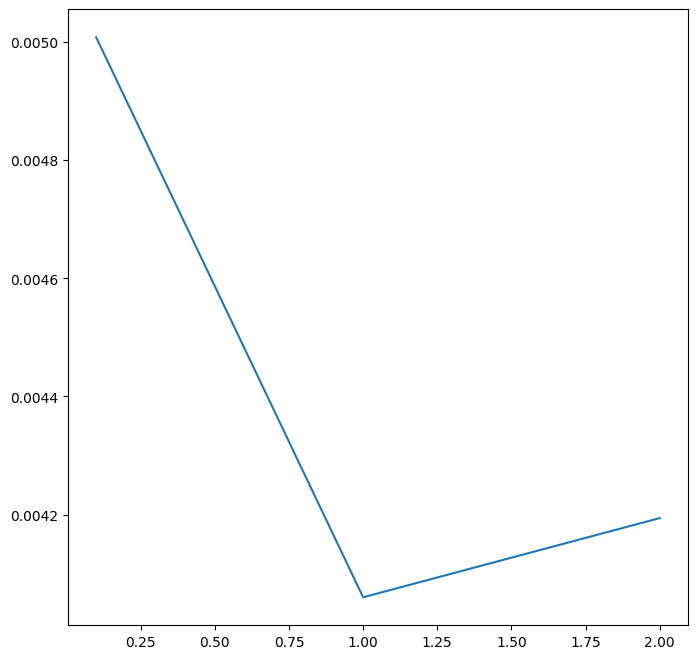

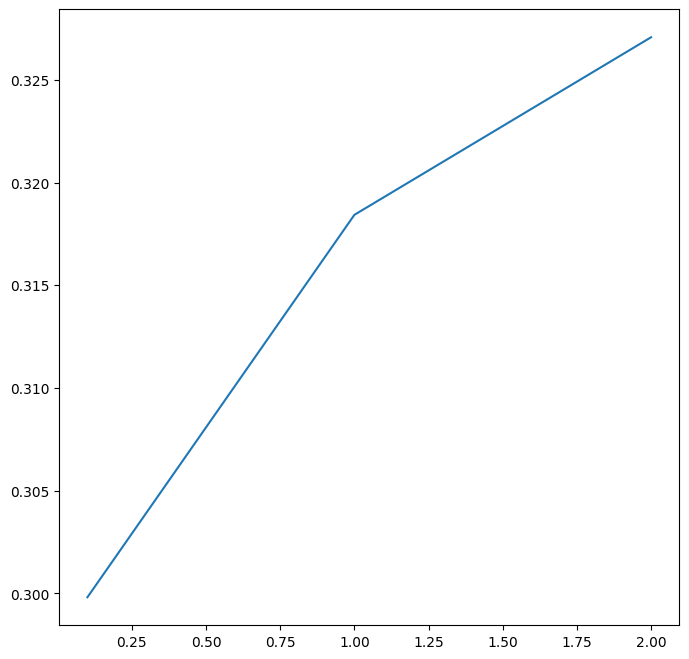

In [14]:
plotter = NNPlots(dataGen, (200, 200))

plotter.plot_error(existing_koefs, mse_loss_record)
plotter.plot_error(existing_koefs, max_loss_record)

/home/c0c0nut/Projects/PINN_Poisson/src/plotting.py:77: UserWarning: The following kwargs were not used by contour: 'linestyle'
  real.contour(
/home/c0c0nut/Projects/PINN_Poisson/src/plotting.py:98: UserWarning: The following kwargs were not used by contour: 'linestyle'
  pred.contour(
/home/c0c0nut/Projects/PINN_Poisson/src/plotting.py:128: UserWarning: The following kwargs were not used by contour: 'linestyle'
  diff.contour(


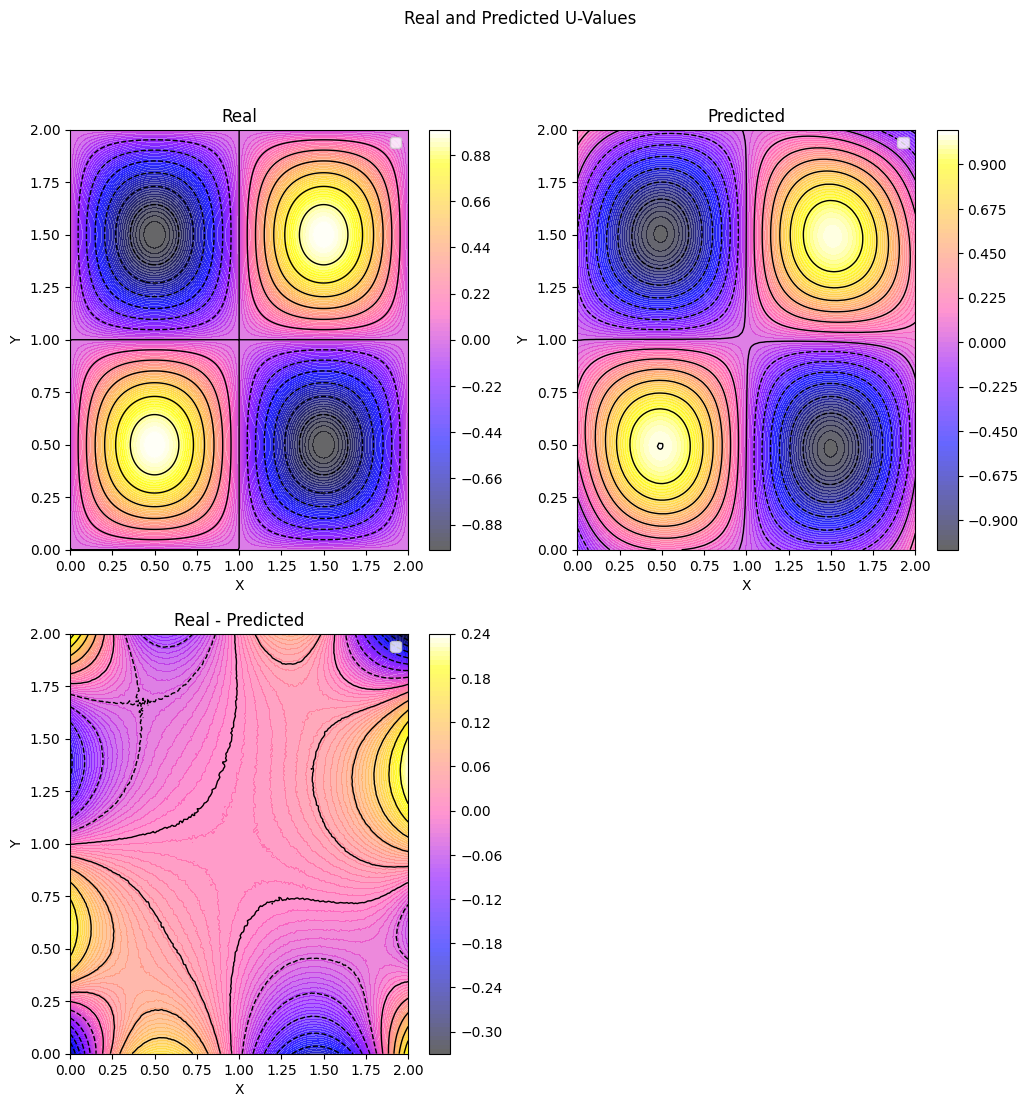

In [15]:
plotter.plot2d_contour(color_map="gnuplot2")